## Description
---
This notebook is created purely for the generation of videos of the surface velocity fields in HYCOM using matplotlib.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import cmocean.cm as cmo
import cmcrameri.cm as cmc

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
def loadData(native=True):
    '''Load GlobCurrent and CMEMS velocity data. Also load model data in either
    'native' grid and resolution or on the GlobCurrent grid by setting
    'native=False'.
    
    Example usage: loadData(native=False)
    
    This function will also set a global variable that checks whether the model data
    currently loaded is in native resolution or not. This will help to ensure functions
    are always using the correct data.
    '''
    # Loading CMEMS and GlobCurrent data
    ds_cmems = xr.open_dataset('../Data/velocity/cmems_ssh.nc')
    ds_cmems = ds_cmems.sel(time=slice('2009-03','2012-02'))
    ds_cmems = ds_cmems.rename_vars({'ugos':'u', 'vgos': 'v'})
    
    ds_gc = xr.open_dataset('../Data/velocity/globcurrent_surface_regional.nc')
    ds_gc = ds_gc.sel(time=slice('2009-03','2012-02'))
    ds_gc['time'] = ds_gc.indexes['time'].to_datetimeindex() # change calendar to datetime64
    ds_gc = ds_gc.rename({'lon':'longitude', 'lat':'latitude'})
    ds_gc = ds_gc.rename_vars({'eastward_eulerian_current_velocity':'u',
                               'northward_eulerian_current_velocity': 'v'})
    
    # Set global variable to check which dataset is loaded
    global NATIVELOADED
    
    # Check to load at native or globcurrent resolution
    if native == True:
        print('Loading data at native resolution...')
        # Loading data at 'native' resolution
        
        # load native HYCOM FREE dataset
        ds_free = xr.open_dataset('../Data/velocity/hycom_free_vel_native.nc')
        ds_free = ds_free.sel(time=slice('2009-03','2012-02'))
#         ds_free = reDimHYCOM(ds_free)
        
        # load native HYCOM CCI dataset
        ds_cci = xr.open_dataset('../Data/velocity/hycom_cci_vel_native.nc')
        ds_cci = ds_cci.sel(time=slice('2009-03','2012-02'))
#         ds_cci = reDimHYCOM(ds_cci)
        
        # load regridded HYCOM OSTIA dataset
        ds_ostia = xr.open_dataset('../Data/velocity/hycom_ostia_vel_native.nc')
        ds_ostia = ds_ostia.sel(time=slice('2009-03','2012-02'))
#         ds_ostia = reDimHYCOM(ds_ostia)
        
        # load regridded HYCOM L2L3 dataset
        ds_l2l3 = xr.open_dataset('../Data/velocity/hycom_l2l3_vel_native.nc')
        ds_l2l3 = ds_l2l3.sel(time=slice('2009-03','2012-02'))
#         ds_l2l3 = reDimHYCOM(ds_l2l3)
        
        # load regridded HYCOM L2 dataset
        ds_l2 = xr.open_dataset('../Data/velocity/hycom_l2p_vel_native.nc')
        ds_l2 = ds_l2.sel(time=slice('2009-03','2012-02'))
#         ds_l2 = reDimHYCOM(ds_l2)
        
        NATIVELOADED = True
        print('Done.')
        return ds_free, ds_ostia, ds_cci, ds_l2l3, ds_l2, ds_cmems, ds_gc
    
    else:
        print('Loading data at GlobCurrent resolution...')
        # Loading model data interpolated to GlobCurrent grid size.
        # Also making sure that minor discrepancies in grids are ignored by setting model
        # lats and lons equal to that of GlobCurrent
        
        # load regridded HYCOM FREE dataset
        ds_free = xr.open_dataset('../Data/velocity/hycom_free_vel_regrid.nc')
        ds_free = ds_free.sel(time=slice('2009-03','2012-02'))
        
        # load regridded HYCOM CCI dataset
        ds_cci = xr.open_dataset('../Data/velocity/hycom_cci_vel_regrid.nc')
        ds_cci = ds_cci.sel(time=slice('2009-03','2012-02'))
        
        # load regridded HYCOM OSTIA dataset
        ds_ostia = xr.open_dataset('../Data/velocity/hycom_ostia_vel_regrid.nc')
        ds_ostia = ds_ostia.sel(time=slice('2009-03','2012-02'))
        
        # load regridded HYCOM L2L3 dataset
        ds_l2l3 = xr.open_dataset('../Data/velocity/hycom_l2l3_vel_regrid.nc')
        ds_l2l3 = ds_l2l3.sel(time=slice('2009-03','2012-02'))
        
        # load regridded HYCOM L2 dataset
        ds_l2 = xr.open_dataset('../Data/velocity/hycom_l2p_vel_regrid.nc')
        ds_l2 = ds_l2.sel(time=slice('2009-03','2012-02'))
        
        NATIVELOADED = False
        print('Done.')
        return ds_free, ds_ostia, ds_cci, ds_l2l3, ds_l2, ds_cmems, ds_gc

In [4]:
ds_free, ds_ostia, ds_cci, ds_l2l3, ds_l2, ds_cmems, ds_gc = loadData(native=False)

/home/harry/miniconda3/envs/ubase/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


Loading data at GlobCurrent resolution...
Done.


## Calculate velocity magnitudes

In [5]:
# Determine which datasets will have a velocity field calculated
datasets = {'free':ds_free, 'cci':ds_cci, 'ostia':ds_ostia, 'l2l3':ds_l2l3,
            'l2':ds_l2, 'cmems':ds_cmems, 'globcurrent':ds_gc}

# Loop through the dictionary and create the velocity fields
for dataset in datasets:
    print(f'Now creating velocity field for: {dataset}...')
    datasets[dataset]['velocity'] = np.hypot(datasets[dataset]['u'],
                                             datasets[dataset]['v'])
    datasets[dataset]['velocity'].attrs['long_name'] = 'Velocity magnitude'
    datasets[dataset]['velocity'].attrs['units'] = 'm.s$^{-1}$'
    print(f'Velocity field for: {dataset} completed.')
print('All done.')

Now creating velocity field for: free...
Velocity field for: free completed.
Now creating velocity field for: cci...
Velocity field for: cci completed.
Now creating velocity field for: ostia...
Velocity field for: ostia completed.
Now creating velocity field for: l2l3...
Velocity field for: l2l3 completed.
Now creating velocity field for: l2...
Velocity field for: l2 completed.
Now creating velocity field for: cmems...
Velocity field for: cmems completed.
Now creating velocity field for: globcurrent...
Velocity field for: globcurrent completed.
All done.


In [17]:
ds_gc['velocity']

<xarray.DataArray 'velocity' (time: 1096, latitude: 160, longitude: 240)>
array([[[0.45775387, 0.46116742, 0.46072963, ..., 0.29683352,
         0.31970373, 0.31470728],
        [0.39353806, 0.417493  , 0.43646678, ..., 0.31886244,
         0.35772645, 0.40061516],
        [0.2551652 , 0.25364262, 0.28974757, ..., 0.25645113,
         0.29511693, 0.35902584],
        ...,
        [0.08563215, 0.09027135, 0.10341672, ..., 0.21542127,
         0.21004291, 0.18542643],
        [0.13799344, 0.13605905, 0.13297789, ..., 0.08080377,
         0.11878922, 0.19045497],
        [0.11810989, 0.1291918 , 0.13200764, ..., 0.10989082,
         0.04676572, 0.02705223]],

       [[0.58175695, 0.5928047 , 0.5886912 , ..., 0.4468904 ,
         0.5043076 , 0.51955897],
        [0.48955438, 0.52683246, 0.557245  , ..., 0.45936832,
         0.53430694, 0.5991626 ],
        [0.36131045, 0.36823195, 0.4061343 , ..., 0.39409727,
         0.4684586 , 0.5563192 ],
...
        [0.13466768, 0.1150822 , 0.09052333, ..., 0.17888775,
         0.25208268, 0.3332957 ],
        [0.15805608, 0.15685207, 0.14043146, ..., 0.22693744,
         0.3056518 , 0.3579122 ],
        [0.15843064, 0.1773298 , 0.17912501, ..., 0.19788535,
         0.23335233, 0.23270217]],

       [[0.4219668 , 0.4831803 , 0.542398  , ..., 0.35670042,
         0.40497577, 0.4237823 ],
        [0.20217909, 0.23051624, 0.26078984, ..., 0.41574132,
         0.466772  , 0.49651328],
        [0.14877985, 0.11796869, 0.05055258, ..., 0.4093764 ,
         0.40756887, 0.40232137],
        ...,
        [0.1001311 , 0.07569122, 0.05187662, ..., 0.21079676,
         0.27591255, 0.3287869 ],
        [0.13158067, 0.12097936, 0.09974889, ..., 0.24127796,
         0.2938342 , 0.32059103],
        [0.15053354, 0.16097851, 0.15497912, ..., 0.20442411,
         0.21284105, 0.19997638]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -49.88 -49.62 -49.38 ... -10.62 -10.38 -10.12
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * time       (time) datetime64[ns] 2009-03-01 2009-03-02 ... 2012-02-29
Attributes:
    comment:                 Meridional component of the combined current at ...
    limitations:             This combined current does not contain all the c...
    long_name:               Absolute geostrophic velocity + hs depth Ekman v...
    depth:                   hs
    horizontal_scale_range:  greater than 100km
    temporal_scale_range:    10 days
    units:                   m s-1

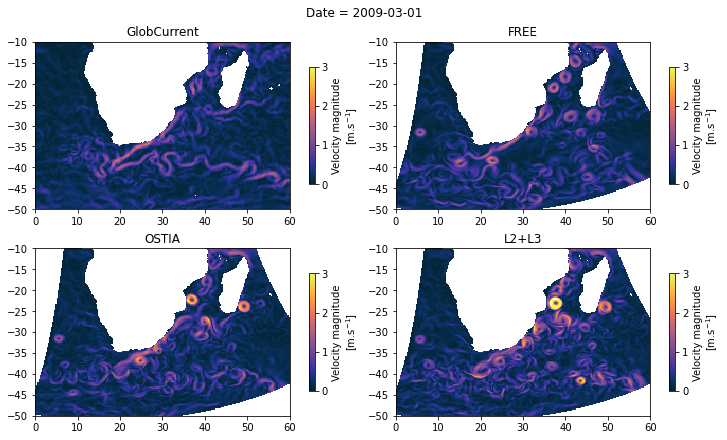

In [35]:
# This code adapted from the tutorial here:
# https://climate-cms.org/posts/2019-09-03-python-animation.html#animation-within-python

# Get a handle on the figure and the axes
fig, axs = plt.subplots(2, 2, figsize=(10,6), constrained_layout=True)
axs = axs.flatten()

fig.suptitle("Date = " + str(ds_gc['velocity'].coords['time'].values[0])[:10])

# Plot the initial frame. 
img1 = ds_gc['velocity'][0,:,:].plot(
    ax=axs[0],
    add_colorbar=True,
    cmap=cmo.thermal,
    vmin=0, vmax=3,
    cbar_kwargs={
        'extend':'neither',
        'shrink':0.7
    }
)
axs[0].set_title('GlobCurrent')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

img2 = ds_free['velocity'][0,:,:].plot(
    ax=axs[1],
    add_colorbar=True,
    cmap=cmo.thermal,
    vmin=0, vmax=3,
    cbar_kwargs={
        'extend':'neither',
        'shrink':0.7
    }
)
axs[1].set_title('FREE')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

img3 = ds_ostia['velocity'][0,:,:].plot(
    ax=axs[2],
    add_colorbar=True,
    cmap=cmo.thermal,
    vmin=0, vmax=3,
    cbar_kwargs={
        'extend':'neither',
        'shrink':0.7
    }
)
axs[2].set_title('OSTIA')
axs[2].set_xlabel('')
axs[2].set_ylabel('')

img4 = ds_l2l3['velocity'][0,:,:].plot(
    ax=axs[3],
    add_colorbar=True,
    cmap=cmo.thermal,
    vmin=0, vmax=3,
    cbar_kwargs={
        'extend':'neither',
        'shrink':0.7
    }
)
axs[3].set_title('L2+L3')
axs[3].set_xlabel('')
axs[3].set_ylabel('')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    img1.set_array(ds_gc['velocity'][frame,:,:].values.flatten())
    img2.set_array(ds_free['velocity'][frame,:,:].values.flatten())
    img3.set_array(ds_ostia['velocity'][frame,:,:].values.flatten())
    img4.set_array(ds_l2l3['velocity'][frame,:,:].values.flatten())
    fig.suptitle("Date = " + str(ds_gc['velocity'].coords['time'].values[frame])[:10])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=len(ds_gc['velocity']),       # Could also be iterable or list
    interval=80     # ms between frames
)

In [36]:
ani.save(f'../Figures/vel/ALL_vel.mp4', dpi=200)